# Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

Load your zillow dataset.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

Here is some sample code to get you started:


from sklearn.linear_model import LinearRegression

#assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
Modify and add to the code above as necessary for it to work with the zillow dataset.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

from env import user, password, host

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

# Load your zillow dataset

In [2]:
df=acquire.clean_zillow()
df.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037
1,0.0,0.0,NaN,10.0,NaN,NaN,6037
2,0.0,0.0,NaN,10.0,NaN,NaN,6037
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037


In [3]:
df = prepare.remove_outliers(df, 1.5, ['Bedrooms', 'Bathrooms', 'Squarefeet','TaxesTotal','Taxes','Year','Fips'])
df.Fips = df.Fips.astype(object)
df.Year = df.Year.astype(object)

In [4]:
df.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037
40,2.0,1.0,725.0,37548.0,1953.0,576.47,6037


# Split data 

In [5]:
train,val,test=prepare.wrangle_zillow()

In [21]:
train.shape,val.shape,test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [22]:
train.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037


# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [7]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(df[['Squarefeet']], df.TaxesTotal)

# make prediction
df['yhat'] = lm.predict(df[['Squarefeet']])

In [8]:
df['baseline'] = df.TaxesTotal.mean()

In [9]:
df.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips,yhat,baseline
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037,388891.390279,325547.334307
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037,268021.238269,325547.334307
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037,276146.962774,325547.334307
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037,264828.989357,325547.334307
40,2.0,1.0,725.0,37548.0,1953.0,576.47,6037,192713.184376,325547.334307


In [10]:
#another way to do it
# from sklearn.linear_model import LinearRegression

# # generate parameters, i.e. create model
# ols_model = LinearRegression().fit(df[['Squarefeet']], df.TaxesTotal)

# # compute predictions and add to original dataframe
# df['yhat'] = ols_model.predict(df[['Squarefeet']])

# df.head(3)

<AxesSubplot:xlabel='Squarefeet', ylabel='TaxesTotal'>

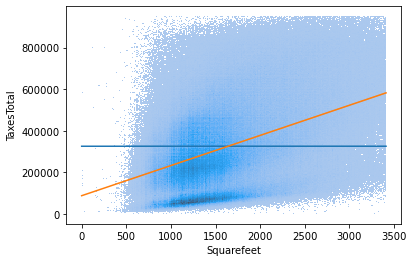

In [11]:
sns.histplot(x = 'Squarefeet', y = 'TaxesTotal', data = df)
sns.lineplot(x = 'Squarefeet', y = 'baseline', data = df)
sns.lineplot(x = 'Squarefeet', y = 'yhat', data = df)

# Plot the residuals for the linear regression model that you made.

In [12]:
df['Residual'] = df.TaxesTotal - df.yhat
df['Baseline_residual'] = df.TaxesTotal - df.baseline
df.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips,yhat,baseline,Residual,Baseline_residual
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037,388891.390279,325547.334307,257868.609721,321212.665693
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037,268021.238269,325547.334307,-98550.238269,-156076.334307
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037,276146.962774,325547.334307,-42880.962774,-92281.334307
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037,264828.989357,325547.334307,25663.010643,-35055.334307
40,2.0,1.0,725.0,37548.0,1953.0,576.47,6037,192713.184376,325547.334307,-155165.184376,-287999.334307


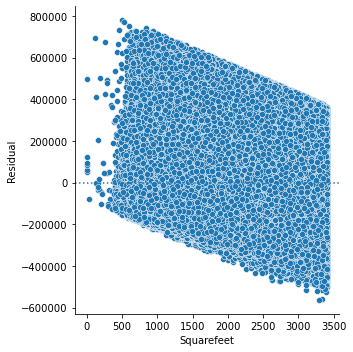

In [13]:
sns.relplot(x = 'Squarefeet', y = 'Residual', data = df)
plt.axhline(0, ls = ':')

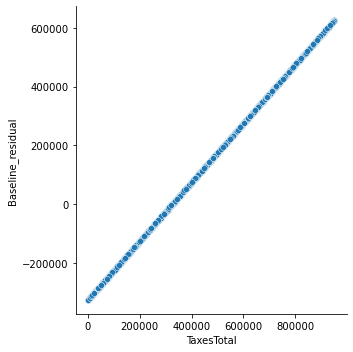

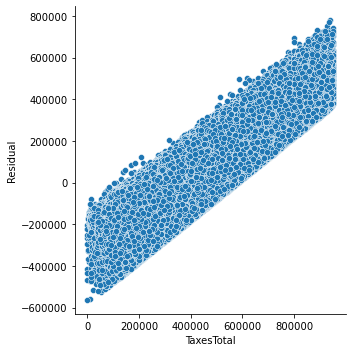

In [14]:
sns.relplot(df.TaxesTotal, df.Baseline_residual)
sns.relplot(df.TaxesTotal, df.Residual)


# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [15]:
#sse is Sum of the Squared Errors 
SSE = (df.Residual**2).sum()
#Sum of the Squared Errors baseline 
SSE_baseline = (df.Baseline_residual**2).sum()
#mse=Mean Squared Error, 
MSE = SSE/len(df)
#Mean Squared Error,Baseline
MSE_baseline = SSE_baseline/len(df)
#rmse=Root Mean Squared Error
RMSE = mean_squared_error(df.TaxesTotal, df.yhat, squared = False)
#Root Mean Squared Error baseline 
RMSE_baseline = mean_squared_error(df.TaxesTotal, df.baseline, squared = False)
#ess Explained Sum of Squares
ESS = sum((df.yhat - df.baseline)**2)
# Total Sum of Errors
TSS = ESS + SSE
print('TSS=',TSS)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('ESS=',ESS)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('RMSE_baseline=',RMSE_baseline)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('RSME=',RMSE)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('MSE Baseline=',MSE_baseline)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('MSE=',MSE)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('SSE BASELINE=',SSE_baseline)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('SSE=',SSE)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

TSS= 6.531764771383829e+16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ESS= 1.0931192756294196e+16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE_baseline= 198492.2561323937
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RSME= 181123.03036501384
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE Baseline= 39399175744.52779
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE= 32805552128.60572
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SSE BASELINE= 6.531764771383518e+16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SSE= 5.43864549575441e+16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [16]:
#by the book 
# from math import sqrt
# # SSE
# SSE = sum(df['residual^2'])
# SSE_baseline = sum(df['residual_baseline^2'])
# MSE = SSE/len(df)
# MSE_baseline = SSE_baseline/len(df)
# RMSE = sqrt(MSE)
# RMSE_baseline = sqrt(MSE_baseline)

# print("RMSE = ", RMSE)
# print("RMSE baseline = ", RMSE_baseline)

# print("MSE = ", MSE)
# print("MSE baseline = ", MSE_baseline)
# print("SSE = ", SSE)
# print("SSE - baseline = ", SSE_baseline)
# square each residual value
# df['residual^2'] = df.Residual ** 2

# df['residual_baseline^2'] = df.Baseline_residual ** 2

# df.head(3)

# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [17]:
#ugly but still works


# df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
# df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

# df_eval['model_error'] = np.array([SSE, MSE, RMSE])
# df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

# print(df_eval)
# print(df_baseline_eval)

In [18]:
df_error = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_error['model_error'] = np.array([SSE,  MSE, RMSE])
df_error['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])
df_error['better_than_baseline'] = df_error.baseline_error > df_error.model_error
df_error

,metric,model_error,baseline_error,better_than_baseline
0,SSE,5.438645e+16,6.531765e+16,True
1,MSE,3.280555e+10,3.939918e+10,True
2,RMSE,1.811230e+05,1.984923e+05,True


# What is the amount of variance explained in your model?


In [19]:
r2_score(df.TaxesTotal, df.yhat)

0.1673543542808219

In [20]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.167
Percent of variance in y explained by x =  16.7 %


# Is your model better than the baseline model?

nope,nope,nope,nope 

# Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:

sum of squared errors (SSE)

explained sum of squares (ESS)

total sum of squares (TSS)

mean squared error (MSE)

root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false